# **Understanding CNNs with Kannada-MNIST**


# Imports
These are the imports we need to get started with machine leraning
- Pandas - Used for handling csv data
- MatPlotLib - Used for plotting graphs
- Keras - A popular deep learning library we will use to create our CNN
- SKLearn - Popular machine learning library we will use to split our data

In [1]:
# 사용할 패키지 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Data
We will load the data, split it, artificially generate more data to make it more diverse and then make it ready for training

In [2]:
# Load the data
Dig_MNIST = pd.read_csv("../input/Kannada-MNIST/Dig-MNIST.csv") # 리더보드 제출 전 테스트 할 있는 데이터
sample_submission = pd.read_csv("../input/Kannada-MNIST/sample_submission.csv") # 제출용 데이터
test = pd.read_csv("../input/Kannada-MNIST/test.csv") # 테스트 데이터
train = pd.read_csv("../input/Kannada-MNIST/train.csv") # 학습 데이터

# Split the data
x = train.iloc[:,1:].values # 두번째 col부터는 783개의 픽셀값을 나타냄
y = train.iloc[:,0].values # 첫번째 col은 label이므로 분리
y[:10] # 숫자는 0부터 9까지 있음
x_test = test.drop('id', axis=1).iloc[:,:].values # test set에서 id를 나타내는 1열을 버린 나머지를 이용해 test 데이터를 만듦
x_dig = Dig_MNIST.drop('label', axis=1).iloc[:,:].values # Dig_MNIST에서 label을 나타내는 1열을 버린 나머지를 이용해 실제 test 데이터를 만듦 
y_dig = Dig_MNIST.label # Dig_MNIST에서 label을 나타내는 1열이 곧 종속변수

# Reshape the data
x = x.reshape(x.shape[0], 28, 28, 1) # 60000개의 0이라는 숫자를 1개씩 28 by 28 array로 재 구조화 
y = to_categorical(y, 10) # label을 binary form으로 인코딩 - 분류 작업 시 정수보다 이진 벡터로 출력변수를 구성하는 것이 효율적이기 때문 or 활성화 함수에서 사용 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_dig = x_dig.reshape(x_dig.shape[0], 28, 28, 1)

# Split the data between train and test (사이킷런에서 사용가능)
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.10, random_state=42) # test(10%), train(90%) random state:데이터 분할시 셔플이 이루어지는데 이를 위한 시드값(default=shuffle이 이루어짐)
# 시드:난수 생성할 때 시작 숫자

# Artificially increase training set
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=10,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   shear_range=0.1,
                                   zoom_range=0.25,
                                   horizontal_flip=False)
# keras에서 이미지데이터 학습을 쉽게 하도록 하기위해 다양한 패키지를 제공.
# 그 중 하나가 ImageDataGenerator 클래스. ImageDataGenerator 클래스를 통해 객체를 생성할 때 파라미터를 전달해주는 것을 통해 데이터의 전처리를 쉽게할 수 있고,
# 또 이 객체의 flow_from_directory 메소드를 활용하면 폴더 형태로된 데이터 구조를 바로 가져와서 사용가능. 이 과정은 매우 직관적이고 코드도 ImageDataGenerator를 사용하지 않는 방법에 비해 상당히 짧음.



valid_datagen = ImageDataGenerator(rescale=1./255.) # 0~1 을 갖는 값으로 rescale

In [3]:
x_dig.shape[0]

10240

In [4]:
x_test.shape[0]

5000

In [5]:
print(x)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]

In [6]:
print(y)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [7]:
np.arange(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [8]:
x.shape[0]

60000

# The CNN

## Simple explanation of what a CNN is
![](https://i.imgur.com/Qd9JpWj.png)
Convolutional neural network (CNN) is a type of neural network architecture specially made to deal with visual data. In this article we will discuss the architecture of CNN and implement it on CIFAR-10 dataset in part-2. The main benefit of using a CNN over simple ANN on visual data is that CNN’s are constrained to deal with image data exclusively. Two main features of CNNs are

- Weight sharing
- Feature extractors

![](https://i.imgur.com/RYMoJpL.png)

As we described above, a simple ConvNet is a sequence of layers, and every layer of a ConvNet transforms one volume of activations to another through a differentiable function. We use three main types of layers to build ConvNet architectures: Convolutional Layer, Pooling Layer, and Fully-Connected Layer (exactly as seen in regular Neural Networks). We will stack these layers to form a full ConvNet architecture.

Several new layers are introduced in CNNs to extract the useful features from our image or reducing the size of image without using the original representation.

### Convolution Layer
Convolutional layer apply convolution operation on the input layer, passing the results to next layer. A convolution operation is basically computing a dot product between their weights and a small region they are connected(currently overlapping) to in the input volume. This will change the dimensions depending on the filter size used and number of filters used.

We can compute the spatial size of the output volume as a function of the input volume size (W), the receptive field size of the Conv Layer neurons (F), the stride with which they are applied (S), and the amount of zero padding used (P) on the border. You can convince yourself that the correct formula for calculating how many neurons “fit” is given by (W−F+2P)/S+1. For example for a 7x7 input and a 3x3 filter with stride 1 and pad 0 we would get a 5x5 output. With stride 2 we would get a 3x3 output.

### ReLU Layer
Rectifying Linear Unit (ReLU) layer applies the relu activation element-wise. It is a mathematical function, which returns a positive value or 0 in place of previous negative values, It does not change the dimensions of the previous layer.

### Pooling Layer
Pooling layer will perform a down-sampling operation along the width and resulting in the reduction of the dimensions. The sole purpose of pooling is to reduce spatial dimensions. There are various types of pooling in which the most common is Max Pooling, i.e taking the maximum element from the window.
![](https://i.imgur.com/5Q54piT.png)

### Stride
Stride decides by how much we move our window ,when we have a stride of one we move across and down a single pixel. With higher stride values, we move large number of pixels at a time and hence produce smaller output volumes.

### Padding
Padding is used to preserve the boundary information , since without padding they are only traversed once.
![](https://i.imgur.com/MWorvXh.png)

### Flattening Layer
This layer will convert the 3-dimensions (height,width,depth) into a single long vector to feed it to the fully connected layer or Dense layer. It connects every neuron in one layer to every neuron in another layer.

Fully Connected Layer and Output Layer
Fully connected layers or dense layers are the same hidden layers consisting of defined number of neurons connected with elements of another layer that we discussed in simple ANN. However the output layer is also the same but the number of neurons depend on our task. For instance in CIFAR-10 dataset we have 10 classes hence we will have 10 neurons in the outer layer.

### Summary
![](https://i.imgur.com/x0DIK9L.jpg)

In summary, the architecture of CNN , we can simply understand that it consist of an input layer followed by a Conv layer. The dimensions of conv layer depends on the data and problem, hence changing the dimensions accordingly. After the Conv Layer there is a activation layer , usually ReLU since it gives better results. After some conv and relu combination , pooling layer is used to reduce the size. Then after some combination of previously defined architecture , flattening layer is used to flatten the input for fully connected layer. Next to these layer, the last layer is the output layer.

In [9]:
batch_size = 1024
num_classes = 10
epochs = 50
learning_rate = 0.001
model_name = 'k-mnist_trained_model.h5'

model = Sequential() # 가장 자주 사용하는 구조인 층을 순서대로 쌓아 올린 네트워크{keras 사용 - 모델 정의(생성)}

# Convolution
# 인공신경망 모델을 효율적으로 학습시키기 윈한 개선 방법들 (BatchNormalization, Dropout, ModelEnsemble)
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))) # 64는 convolution 출력 filter 수, kernel_size : convolution window 길이
model.add(BatchNormalization()) # 인공신경망에 입력값을 평균0, 분산1로 정규화해서 네트워크의 학습이 잘 일어나도록 돕는다.
# batch : 가중치 학습을 위해 gradient descent(경사하강법)을 적용할 때 모델이 입력을 받는 데이터의 청크(인스턴스)의 갯수
# 인스턴스 : 컴퓨터 저장공간에서 할당된 실체를 의미
model.add(Conv2D(64, kernel_size=3, activation='relu')) # second Convolution layer
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu')) # same : 출력이 원래 입력과 같은 길이가 되도록 입력을 채운다. # padding
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2))) # 2 by 2로 max pooling
model.add(Dropout(0.2)) # 과적합을 방지하기 위해 activation을 0.2의 확률로 지워버린다.


model.add(Conv2D(128, kernel_size=3, activation='relu')) # 위와 같음
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=3, activation='relu')) # 위와 같음
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten()) # 네트워크의 첫번째 층 - 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 한다.
model.add(Dense(256)) # dense로 층을 쌓음 - 첫번째 Dense층은 256개의 노드를 가짐
model.add(BatchNormalization())
model.add(Dense(128)) # 두번째 Dense층은 128개의 노드를 가짐
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax')) # 마지막 층은 10개의 노드의 소프트맥스층 : 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1이다.
# 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력

model.summary()

optimizer = RMSprop(lr=learning_rate) # 기울기를 단순 누적하지 않고 지수 가중 이동 평균(Exponentially weighted moving average)을 사용하여 "최신 기울기들이 더 크게 반영되도록 함"

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
# 컴파일 단계 : 학습과정 설정, categorical_crossentropy(손실함수, 가중치 텐서를 학습하기 위한 피드백 신호로 사용되며 훈련하는 동안 최소화 된다.
#                                                     미니 배치 확률적 경사 하강법을 통해 손실이 감소됨.)
# optimizer : 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        102464    
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)       

## Fitting the model

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=200,
                                            verbose=1,
                                            factor=0.2)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

history = model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=batch_size), # 모델이 데이터 인스턴스를 1024개 본후에 가중치를 업데이트 하고, 배치정규화를 적용하면 각 1024개의 데이터 인스턴스가 " feature"별로 정규화된다.
                              steps_per_epoch=100,
                              epochs=epochs,
                              validation_data=valid_datagen.flow(x_valid, y_valid),
                              validation_steps=50,
                              callbacks=[learning_rate_reduction, es])

Epoch 1/50  
100/100 [==============================] - 42s 417ms/step - loss: 0.5126 - accuracy: 0.8338 - val_loss: 13.3222 - val_accuracy: 0.0887  
Epoch 2/50  
100/100 [==============================] - 35s 353ms/step - loss: 0.1288 - accuracy: 0.9596 - val_loss: 18.1388 - val_accuracy: 0.1094  
Epoch 3/50  
100/100 [==============================] - 35s 350ms/step - loss: 0.0803 - accuracy: 0.9741 - val_loss: 22.4887 - val_accuracy: 0.0906  
Epoch 4/50  
100/100 [==============================] - 38s 377ms/step - loss: 0.0617 - accuracy: 0.9806 - val_loss: 24.6338 - val_accuracy: 0.0928  
Epoch 5/50  
100/100 [==============================] - 36s 365ms/step - loss: 0.0525 - accuracy: 0.9834 - val_loss: 20.1508 - val_accuracy: 0.1019  
Epoch 6/50  
100/100 [==============================] - 35s 352ms/step - loss: 0.0475 - accuracy: 0.9848 - val_loss: 2.2658 - val_accuracy: 0.4456    
Epoch 7/50    
100/100 [==============================] - 36s 361ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0040 - val_accuracy: 0.9869  
Epoch 8/50  
100/100 [==============================] - 35s 353ms/step - loss: 0.0395 - accuracy: 0.9875 - val_loss: 0.0340 - val_accuracy: 0.9804  
Epoch 9/50  
100/100 [==============================] - 36s 361ms/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0490 - val_accuracy: 0.9956  
Epoch 10/50  
100/100 [==============================] - 36s 363ms/step - loss: 0.0322 - accuracy: 0.9896 - val_loss: 1.4196e-04 - val_accuracy: 0.9962  
Epoch 11/50  
100/100 [==============================] - 36s 356ms/step - loss: 0.0325 - accuracy: 0.9895 - val_loss: 0.0022 - val_accuracy: 0.9962  
Epoch 12/50  
100/100 [==============================] - 36s 364ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.0285 - val_accuracy: 0.9918  
Epoch 13/50  
100/100 [==============================] - 36s 357ms/step - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.1462 - val_accuracy: 0.9937  
Epoch 14/50  
100/100 [==============================] - 36s 362ms/step - loss: 0.0285 - accuracy: 0.9911 - val_loss: 0.0025 - val_accuracy: 0.9969  
Epoch 15/50  
100/100 [==============================] - 37s 366ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 3.2904e-04 - val_accuracy: 0.9975  
Epoch 16/50   
100/100 [==============================] - 36s 357ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 1.6307e-04 - val_accuracy: 0.9956  
Epoch 17/50  
100/100 [==============================] - 37s 366ms/step - loss: 0.0263 - accuracy: 0.9918 - val_loss: 0.0134 - val_accuracy: 0.9981  
Epoch 18/50  
100/100 [==============================] - 35s 355ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 6.9478e-05 - val_accuracy: 0.9956  
Epoch 19/50  
100/100 [==============================] - 36s 363ms/step - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.0157 - val_accuracy: 0.9893  
Epoch 20/50  
100/100 [==============================] - 37s 367ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 1.4070e-04 - val_accuracy: 0.9975  
Epoch 21/50  
100/100 [==============================] - 36s 356ms/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.0022 - val_accuracy: 0.9950  
Epoch 22/50  
100/100 [==============================] - 37s 366ms/step - loss: 0.0222 - accuracy: 0.9927 - val_loss: 2.3892e-04 - val_accuracy: 0.9987  
Epoch 23/50  
100/100 [==============================] - 35s 353ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.1299 - val_accuracy: 0.9949  
Epoch 24/50  
100/100 [==============================] - 36s 363ms/step - loss: 0.0206 - accuracy: 0.9932 - val_loss: 0.0901 - val_accuracy: 0.9937  
Epoch 25/50  
100/100 [==============================] - 36s 362ms/step - loss: 0.0212 - accuracy: 0.9933 - val_loss: 2.1974e-04 - val_accuracy: 0.9962  
Epoch 26/50   
100/100 [==============================] - 36s 361ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 1.1902e-04 - val_accuracy: 0.9975  
Epoch 27/50  
100/100 [==============================] - 37s 366ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 1.3481e-05 - val_accuracy: 0.9994  
Epoch 28/50  
100/100 [==============================] - 36s 359ms/step - loss: 0.0201 - accuracy: 0.9934 - val_loss: 1.2631e-05 - val_accuracy: 0.9931  
Epoch 29/50  
100/100 [==============================] - 37s 368ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 3.7328e-05 - val_accuracy: 0.9969  
Epoch 30/50  
100/100 [==============================] - 37s 370ms/step - loss: 0.0202 - accuracy: 0.9936 - val_loss: 1.4287e-04 - val_accuracy: 0.9962  
Epoch 31/50  
100/100 [==============================] - 36s 358ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 4.4069e-06 - val_accuracy: 0.9987  
Epoch 32/50  
100/100 [==============================] - 37s 370ms/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0133 - val_accuracy: 0.9962  
Epoch 33/50  
100/100 [==============================] - 36s 359ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0719 - val_accuracy: 0.9931  
Epoch 34/50  
100/100 [==============================] - 37s 371ms/step - loss: 0.0185 - accuracy: 0.9939 - val_loss: 0.0102 - val_accuracy: 0.9949  
Epoch 35/50  
100/100 [==============================] - 36s 365ms/step - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0480 - val_accuracy: 0.9762  
Epoch 36/50  
100/100 [==============================] - 36s 357ms/step - loss: 0.0172 - accuracy: 0.9943 - val_loss: 9.7189e-06 - val_accuracy: 0.9944  
Epoch 37/50  
100/100 [==============================] - 37s 369ms/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 5.0412e-04 - val_accuracy: 0.9950  
Epoch 38/50  
100/100 [==============================] - 36s 364ms/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.0081 - val_accuracy: 0.9981  
Epoch 39/50  
100/100 [==============================] - 37s 366ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0250 - val_accuracy: 0.9969  
Epoch 40/50  
100/100 [==============================] - 37s 369ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 8.4155e-05 - val_accuracy: 0.9956  
Epoch 41/50  
100/100 [==============================] - 36s 360ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0054 - val_accuracy: 0.9962  
Epoch 42/50  
100/100 [==============================] - 37s 368ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 4.2803e-06 - val_accuracy: 0.9937  
Epoch 43/50   
100/100 [==============================] - 37s 367ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 7.7946e-05 - val_accuracy: 0.9981  
Epoch 44/50  
100/100 [==============================] - 36s 360ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.0093 - val_accuracy: 0.9937  
Epoch 45/50  
100/100 [==============================] - 37s 370ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 2.4259e-05 - val_accuracy: 0.9987  
Epoch 46/50  
100/100 [==============================] - 36s 361ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0040 - val_accuracy: 0.9975  
Epoch 47/50  
100/100 [==============================] - 37s 368ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 1.0681e-04 - val_accuracy: 0.9975  
Epoch 48/50  
100/100 [==============================] - 37s 369ms/step - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0011 - val_accuracy: 0.9956  
Epoch 49/50  
100/100 [==============================] - 36s 362ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 8.4140e-04 - val_accuracy: 0.9962  
Epoch 50/50  
100/100 [==============================] - 37s 370ms/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 8.2948e-04 - val_accuracy: 0.9962  

# Visualising accuracy and loss

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

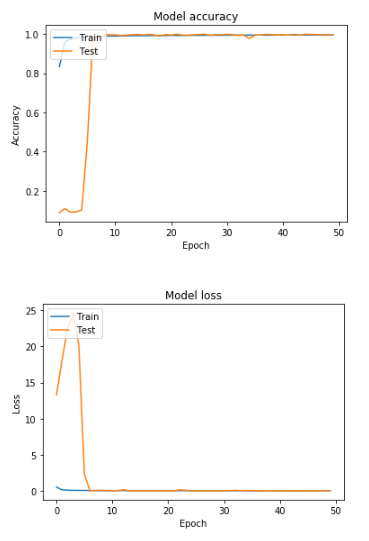